<h1 style="color:brown"><i>MACHINE LEARNING PROJECT: 
    <p style="color:brown; text-align:center;">CREDIT CARD FRAUD DETECTION WITH MACHINE LEARNING</p></i></h1>

This was a project done by a group of three: myself, Mame Cheik and Pene Mamodou. 

<h2><i style="color:blue" >Introduction</i></h2>

<body>
    <p>
This project aims to identify the best model in order to determine whether a transaction is fraud
or non-fraud.
    
As is typical for a dataset of this sort, the dataset is heavily unbalanced. The ratio of zeros (non-fraud) to ones (fraud) is 1:598 (after removing the duplicated rows) which presents an enormous challenge of classifying correctly the minority class.

We have employed Support Vector Machines, Neural Network and Random Forest Classifier to be able to identify the
best model. For  each model (except SVM, which needed an enormous amount of time to be trained for oversampling), we used three strategies:
    <ul>
        <li> a) The whole dataset</li>
        <li>b) Undersampling </li>
        <li>c) Oversampling</li>
    </ul>

For a problem of this sort, the most important metric is not the usual accuracy. We do not consider the accuracy because the majority class consists of over 99% of the data. Hence, conclusions drawn even from an accuracy of 99% would be misleading. Hence, we consider the precision-recall metrics, the ranking metrics, specifically the auc-roc score which defines how well the model is able to differentiate the classes <a href="https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/">(1)</a>.
    
    Finally, we present a table that shows each model and identify the best model for the problem.

   </p>
</body>




<h2>Data Preprocessing</h2>

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [161]:
df.shape

(284807, 31)

In [162]:
#Let's check if there are null values.
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Great, there are no null values

In [163]:
df.drop_duplicates(inplace = True) 
df.shape

(283726, 31)

In [164]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [165]:
ratio = 283253/473
majority_percentage = 100*(283253/283726)
print('The ratio is 1 to {} and the percentage of the majority class is {}%'.format(ratio,majority_percentage))

The ratio is 1 to 598.8435517970402 and the percentage of the majority class is 99.83328986416473%


The dataset is heavily imbalanced. We see a ratio of 1 to about 598 which is over 99%.

(array([283253.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    473.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

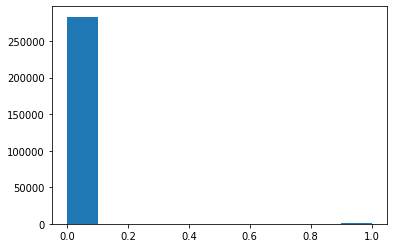

In [166]:
#Let's also plot the 'Class' column on a histogram
plt.hist(df['Class'])

<AxesSubplot:>

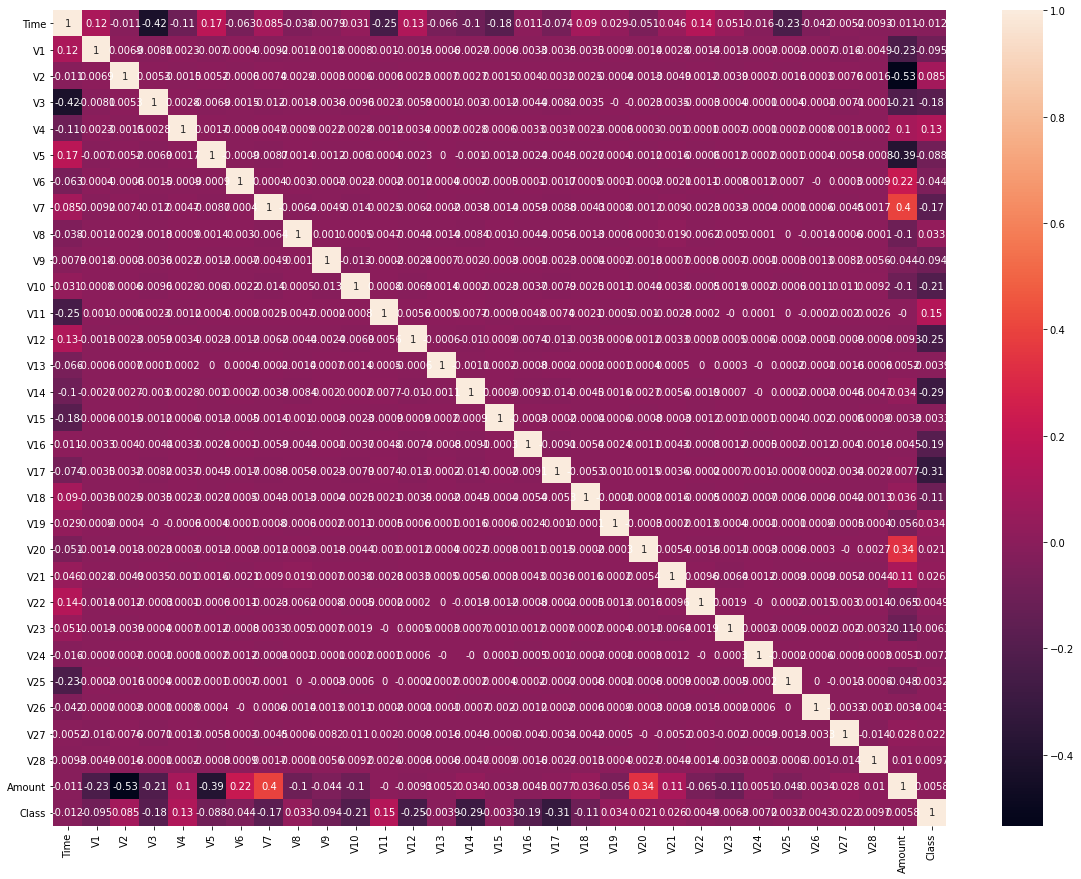

In [167]:
#Let's check the correlation in the dataset. Are there some features that should be dropped?
#Do we need to drop time?

import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(round(df.corr(), 4), annot = True)

The correlations with 'Class' seem to be very low in all the features.

Besides, domain knowledge of fraud necessitates that we consider time as a factor.


In [168]:
#We separate the features from the target
df1=df.drop(['Class'],axis=1).copy()
y=df['Class'].copy()
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [169]:
#We verify the shape
df1.shape, y.shape

((283726, 30), (283726,))

In [170]:
#The 'Amount' and 'Time' rows are not scaled like the entire dataset. Hence, we scale them.
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
amount=df1['Amount'].values
df1['Amount']=sc.fit_transform(amount.reshape(-1,1))
time=df1['Time'].values
df1['Time']=sc.fit_transform(time.reshape(-1,1))
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [171]:
df1.shape

(283726, 30)

<h2> 1) NEURAL NETWORK</h2>

In [172]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense ,Activation, Flatten
from keras.activations import relu,sigmoid
from tensorflow import keras
import tensorflow as tf
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')


In [173]:
#We split the data to begin our model
from sklearn.model_selection import train_test_split

X_train, X1_test, y_train, y1_test = train_test_split( df1, y, test_size=0.20, random_state=1)

In [174]:
X_train.shape,y_train.shape,X1_test.shape,y1_test.shape

((226980, 30), (226980,), (56746, 30), (56746,))

## 1.1) Using all the dataset

We initialize the weights such that we assign more weights to the minority class

In [175]:
weight_initializer={0:1,1:598}

In [176]:
model1=keras.Sequential([
keras.layers.Dense(200,input_shape=(30,),activation='relu',kernel_initializer='he_uniform')])
model1.add(tf.keras.layers.Dense(400,activation='relu'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))
        

In [177]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model1_history=model1.fit(X_train,y_train,class_weight=weight_initializer,
                        batch_size=128,epochs=20,validation_data=(X1_test,y1_test))

Epoch 1/20
1774/1774 [==============================] - 24s 9ms/step - loss: 0.8305 - accuracy: 0.9605 - val_loss: 0.1366 - val_accuracy: 0.9622
Epoch 2/20
1774/1774 [==============================] - 13s 7ms/step - loss: 0.2366 - accuracy: 0.9721 - val_loss: 0.0950 - val_accuracy: 0.9768
Epoch 3/20
1774/1774 [==============================] - 10s 6ms/step - loss: 0.2109 - accuracy: 0.9771 - val_loss: 0.1325 - val_accuracy: 0.9573
Epoch 4/20
1774/1774 [==============================] - 9s 5ms/step - loss: 0.1696 - accuracy: 0.9750 - val_loss: 0.0517 - val_accuracy: 0.9890
Epoch 5/20
1774/1774 [==============================] - 8s 4ms/step - loss: 0.1397 - accuracy: 0.9804 - val_loss: 0.0567 - val_accuracy: 0.9845
Epoch 6/20
1774/1774 [==============================] - 8s 4ms/step - loss: 0.1148 - accuracy: 0.9830 - val_loss: 0.0400 - val_accuracy: 0.9892
Epoch 7/20
1774/1774 [==============================] - 6s 4ms/step - loss: 0.1037 - accuracy: 0.9855 - val_loss: 0.0301 - val_accura

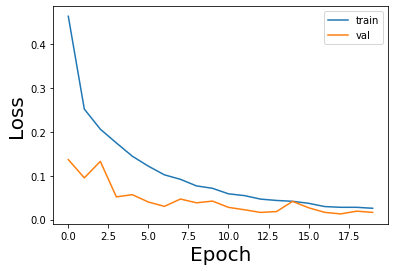

In [178]:
plt.plot(model1_history.history['loss'], label='train')
plt.plot(model1_history.history['val_loss'], label='val')
plt.xlabel(r'Epoch', fontsize=20)
plt.ylabel(r'Loss', fontsize=20)
plt.legend()
plt.show()

<p>
The model seems to be learning well. The training loss is decreasing. Although the validation loss goes up and down it seems to be converging.
</p>

In [179]:
from sklearn.metrics import roc_auc_score
nn1_pred=model1.predict(X1_test)
#The roc_auc score tells us how well the model is able to correctly distinguish classes 1 and 0. Thus, the higher 
#the roc_auc score, the better the model
print(roc_auc_score(y1_test,nn1_pred))

0.9624360942951106


In [180]:
i=np.round(nn1_pred)
cm1 = confusion_matrix(y1_test,i)
print(classification_report(y1_test, i))
cm1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.25      0.85      0.39        87

    accuracy                           1.00     56746
   macro avg       0.62      0.92      0.69     56746
weighted avg       1.00      1.00      1.00     56746



array([[56437,   222],
       [   13,    74]])

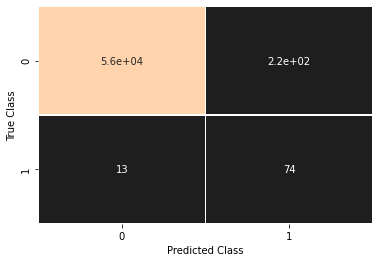

In [181]:
plt.figure(figsize=(6,4))
import seaborn as sns
sns.heatmap(cm1, annot=True, center=0,cmap=None, linewidths=.5,cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

The model is able to classify the minority class fairly well.

## 1.2) Undersampling

In [182]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)
y_resampled.value_counts()


1    386
0    386
Name: Class, dtype: int64

In [183]:
X_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.766646,1.266461,-0.003237,0.472311,0.196469,-0.828370,-1.289497,-0.082260,-0.215293,0.302550,...,-0.120402,0.076517,0.236960,-0.023871,0.794083,0.338582,1.096280,-0.085397,0.003421,-0.333399
1,-1.389337,-2.086607,-1.444673,1.679377,-0.202797,2.396501,-1.126676,-0.901935,0.547271,-0.374939,...,0.263875,0.108114,-0.420745,0.428240,-0.349892,-0.471847,-0.067801,0.007006,0.147955,-0.349773
2,1.429266,1.968355,0.358825,-2.496922,1.301222,1.174681,-0.428394,0.555644,-0.138886,-0.032080,...,-0.189467,-0.003924,0.083990,-0.063789,0.154446,0.474519,-0.517175,-0.013294,-0.033242,-0.230084
3,1.624755,-0.192293,1.278575,-0.781901,-0.517355,0.632361,-0.794714,0.585694,0.353946,-0.189904,...,-0.111363,-0.298995,-0.840907,0.151456,0.494330,-0.413433,0.122495,0.099616,0.021004,-0.345419
4,-1.271058,-0.436547,-0.244481,1.653566,-0.916333,-0.779179,-0.002719,0.048142,0.120533,-1.717847,...,0.474052,0.397340,0.869693,0.241773,0.234410,-0.571093,-0.280123,0.141610,0.155243,0.091164


In [184]:
X_resampled.shape

(772, 30)

In [185]:
epochs = 60
learning_rate = 0.1
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)


In [186]:
model2 = Sequential()
model2.add(Dense(400, kernel_initializer='he_uniform', activation=tf.nn.relu, input_dim=30)) 
model2.add(Dense(200, kernel_initializer='he_uniform', activation=tf.nn.relu))
model2.add(Dense(1, kernel_initializer='normal', activation=tf.nn.sigmoid))

model2.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
    

In [187]:
lr_model_history2= model2.fit(X_resampled, y_resampled,
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/500
7/7 [==============================] - 5s 173ms/step - loss: 2.3079 - accuracy: 0.5179 - val_loss: 2.3520 - val_accuracy: 0.7613
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7908 - accuracy: 0.9302 - val_loss: 0.0888 - val_accuracy: 0.9548
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.9410 - val_loss: 0.2359 - val_accuracy: 0.8774
Epoch 4/500
7/7 [==============================] - 0s 11ms/step - loss: 0.2204 - accuracy: 0.9613 - val_loss: 0.3406 - val_accuracy: 0.8387
Epoch 5/500
7/7 [==============================] - 0s 13ms/step - loss: 0.1425 - accuracy: 0.9466 - val_loss: 0.3252 - val_accuracy: 0.8516
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 0.1393 - accuracy: 0.9489 - val_loss: 0.2494 - val_accuracy: 0.8774
Epoch 7/500
7/7 [==============================] - 0s 12ms/step - loss: 0.1005 - accuracy: 0.9701 - val_loss: 0.2342 - val_accuracy: 0.8839
Epoch 8/500
7/7 [=====

7/7 [==============================] - 0s 13ms/step - loss: 0.0422 - accuracy: 0.9811 - val_loss: 0.2666 - val_accuracy: 0.8903
Epoch 118/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0455 - accuracy: 0.9785 - val_loss: 0.2658 - val_accuracy: 0.8903
Epoch 119/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0404 - accuracy: 0.9800 - val_loss: 0.2666 - val_accuracy: 0.8903
Epoch 120/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0529 - accuracy: 0.9740 - val_loss: 0.2677 - val_accuracy: 0.8903
Epoch 121/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0412 - accuracy: 0.9845 - val_loss: 0.2674 - val_accuracy: 0.8903
Epoch 122/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0416 - accuracy: 0.9832 - val_loss: 0.2678 - val_accuracy: 0.8903
Epoch 123/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9843 - val_loss: 0.2670 - val_accuracy: 0.8903
Epoch 124/500
7/7 [======

7/7 [==============================] - 0s 12ms/step - loss: 0.0438 - accuracy: 0.9811 - val_loss: 0.2694 - val_accuracy: 0.8903
Epoch 176/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0427 - accuracy: 0.9798 - val_loss: 0.2690 - val_accuracy: 0.8903
Epoch 177/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0449 - accuracy: 0.9762 - val_loss: 0.2686 - val_accuracy: 0.8903
Epoch 178/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0399 - accuracy: 0.9840 - val_loss: 0.2691 - val_accuracy: 0.8903
Epoch 179/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0281 - accuracy: 0.9892 - val_loss: 0.2687 - val_accuracy: 0.8903
Epoch 180/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0343 - accuracy: 0.9872 - val_loss: 0.2687 - val_accuracy: 0.8903
Epoch 181/500
7/7 [==============================] - 0s 17ms/step - loss: 0.0322 - accuracy: 0.9864 - val_loss: 0.2693 - val_accuracy: 0.8903
Epoch 182/500
7/7 [====

7/7 [==============================] - 0s 8ms/step - loss: 0.0350 - accuracy: 0.9856 - val_loss: 0.2698 - val_accuracy: 0.8903
Epoch 234/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.9793 - val_loss: 0.2695 - val_accuracy: 0.8903
Epoch 235/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0402 - accuracy: 0.9797 - val_loss: 0.2692 - val_accuracy: 0.8903
Epoch 236/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0394 - accuracy: 0.9806 - val_loss: 0.2696 - val_accuracy: 0.8903
Epoch 237/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.2694 - val_accuracy: 0.8903
Epoch 238/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9875 - val_loss: 0.2715 - val_accuracy: 0.8903
Epoch 239/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0359 - accuracy: 0.9839 - val_loss: 0.2714 - val_accuracy: 0.8903
Epoch 240/500
7/7 [=====

7/7 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.9829 - val_loss: 0.2730 - val_accuracy: 0.8903
Epoch 292/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0329 - accuracy: 0.9838 - val_loss: 0.2731 - val_accuracy: 0.8903
Epoch 293/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0334 - accuracy: 0.9852 - val_loss: 0.2729 - val_accuracy: 0.8903
Epoch 294/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0306 - accuracy: 0.9878 - val_loss: 0.2726 - val_accuracy: 0.8903
Epoch 295/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0391 - accuracy: 0.9776 - val_loss: 0.2728 - val_accuracy: 0.8903
Epoch 296/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9871 - val_loss: 0.2730 - val_accuracy: 0.8903
Epoch 297/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0289 - accuracy: 0.9898 - val_loss: 0.2731 - val_accuracy: 0.8903
Epoch 298/500
7/7 [=======

7/7 [==============================] - 0s 7ms/step - loss: 0.0360 - accuracy: 0.9839 - val_loss: 0.2741 - val_accuracy: 0.8903
Epoch 408/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9856 - val_loss: 0.2740 - val_accuracy: 0.8903
Epoch 409/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9894 - val_loss: 0.2742 - val_accuracy: 0.8903
Epoch 410/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 0.9907 - val_loss: 0.2740 - val_accuracy: 0.8903
Epoch 411/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0316 - accuracy: 0.9874 - val_loss: 0.2740 - val_accuracy: 0.8903
Epoch 412/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0313 - accuracy: 0.9941 - val_loss: 0.2742 - val_accuracy: 0.8903
Epoch 413/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0291 - accuracy: 0.9924 - val_loss: 0.2740 - val_accuracy: 0.8903
Epoch 414/500
7/7 [=======

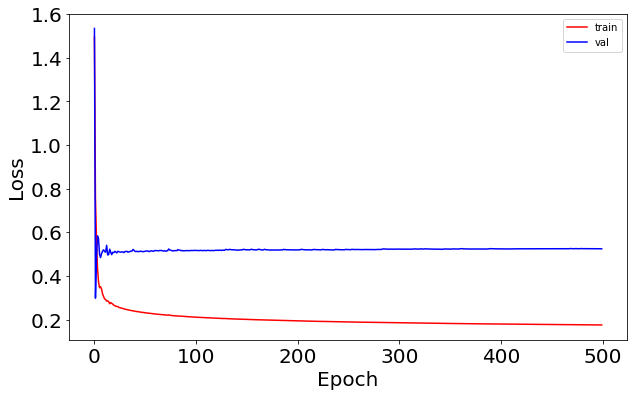

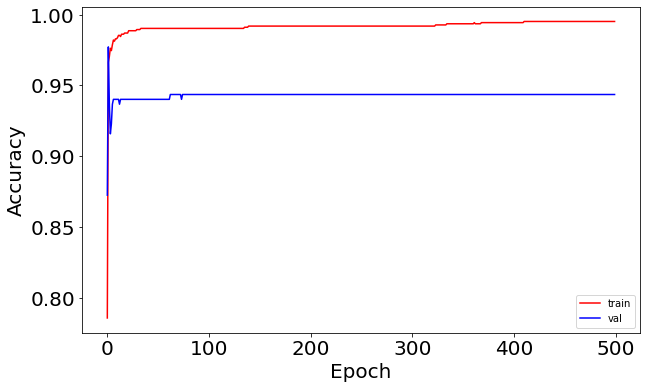

In [188]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history2.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history2.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)


# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history2.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history2.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

The model is learning better than the first model.

In [189]:
ypred2=model2.predict(X1_test)
ypred2_=np.round(ypred2)

In [190]:
cm2=confusion_matrix(y1_test,ypred2_)
print(classification_report(
                      y1_test,
                      ypred2_))
cm2

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56659
           1       0.05      0.85      0.10        87

    accuracy                           0.98     56746
   macro avg       0.53      0.91      0.54     56746
weighted avg       1.00      0.98      0.99     56746



array([[55343,  1316],
       [   13,    74]])

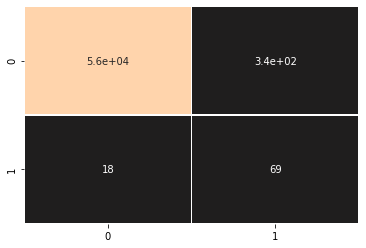

In [191]:
plt.figure(figsize=(6,4))
import seaborn as sns
sns.heatmap(cm5,annot=True,center=0, linewidths=.5,cbar=False)
plt.show()

## 1.3) Oversampling

In [192]:
from imblearn.over_sampling import SMOTE 

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)

X_os, y_os = sm.fit_resample(X_train,y_train)
print('Resampled dataset shape %s' % Counter(y_os))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 226594, 1: 226594})


In [193]:
# define model
model3 = Sequential()
model3.add(Dense(500, kernel_initializer='he_uniform', activation=tf.nn.relu, input_dim=30)) 
model3.add(Dense(300, kernel_initializer='he_uniform', activation=tf.nn.relu))
model3.add(Dense(100, kernel_initializer='he_uniform', activation=tf.nn.relu))

model3.add(Dense(1, kernel_initializer='glorot_uniform', activation=tf.nn.sigmoid))

# compile model
model3.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [194]:
lr_model_history3= model3.fit(X_os, y_os,
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/30
5665/5665 [==============================] - 28s 5ms/step - loss: 0.1581 - accuracy: 0.9490 - val_loss: 0.1024 - val_accuracy: 0.9370
Epoch 2/30
5665/5665 [==============================] - 24s 4ms/step - loss: 0.0675 - accuracy: 0.9713 - val_loss: 0.0895 - val_accuracy: 0.9458
Epoch 3/30
5665/5665 [==============================] - 25s 4ms/step - loss: 0.0573 - accuracy: 0.9756 - val_loss: 0.0753 - val_accuracy: 0.9563
Epoch 4/30
5665/5665 [==============================] - 23s 4ms/step - loss: 0.0524 - accuracy: 0.9789 - val_loss: 0.0707 - val_accuracy: 0.9622
Epoch 5/30
5665/5665 [==============================] - 22s 4ms/step - loss: 0.0493 - accuracy: 0.9813 - val_loss: 0.0647 - val_accuracy: 0.9689
Epoch 6/30
5665/5665 [==============================] - 24s 4ms/step - loss: 0.0466 - accuracy: 0.9831 - val_loss: 0.0626 - val_accuracy: 0.9710
Epoch 7/30
5665/5665 [==============================] - 20s 4ms/step - loss: 0.0452 - accuracy: 0.9840 - val_loss: 0.0605 - val_ac

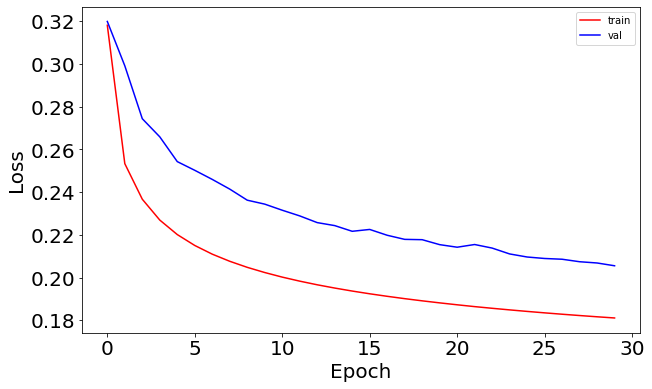

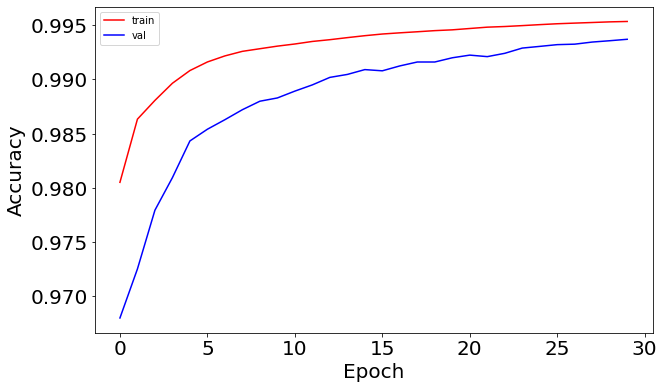

In [195]:


# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history3.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history3.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)


# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history3.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history3.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

The model is learning quite well too

In [196]:
ypred3=model3.predict(X1_test)
ypred3_=np.round(ypred3)


cm3=confusion_matrix(y1_test,ypred3_)
print(classification_report(
                      y1_test,
                      ypred3_))
cm3

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56659
           1       0.16      0.87      0.27        87

    accuracy                           0.99     56746
   macro avg       0.58      0.93      0.63     56746
weighted avg       1.00      0.99      1.00     56746



array([[56259,   400],
       [   11,    76]])

<h1>2) RANDOM FOREST</h1>

<h2> 2.1) All the Dataset </h2>

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
model4 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample',random_state=0)
model4.fit(X_train,y_train)
Rf4_pred=model4.predict(X1_test)


In [199]:
model4.score(X_train,y_train),model4.score(X1_test,y1_test) 


(0.9998898581372808, 0.9995241955380115)

The test score is less than the train score so there is no overfitting in the model

In [200]:
from sklearn.metrics import confusion_matrix
cm4_RF=confusion_matrix(y1_test,Rf4_pred)
cm4_RF

array([[56658,     1],
       [   26,    61]])

The model is misclassifying 27 values!


We can see the confusion matrix on a heatmap

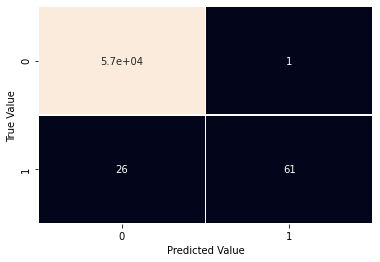

In [201]:
plt.figure(figsize=(6,4))
import seaborn as sns
sns.heatmap(cm4_RF, annot=True, linewidths=.5,cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [202]:
print(classification_report(y1_test,Rf4_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.98      0.70      0.82        87

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [203]:
print(roc_auc_score(y1_test,Rf4_pred))

0.8505658879203334


The roc_auc score gives us a fairly good score. However, we see that in comaparison with the accuracy metric (model.score), this tells us better whether we are doing badly or not. The accuracy for the train and test was very high but the did not reflect such in the model. Hence, we see clearly that accuracy is not the metric to consider here. 

We check for the oversampled and undersampled

<h2>  2.2) Undersampling</h2>

In [204]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)
X_resampled.shape, y_resampled.shape

((772, 30), (772,))

In [205]:
model5 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample',random_state=0)
model5.fit(X_resampled,y_resampled)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=10,
                       random_state=0)

In [206]:
pred_under = model5.predict(X1_test)

In [207]:
model5.score(X_train,y_train),model5.score(X1_test,y1_test) 

(0.9711780773636444, 0.9707292143939661)

In [208]:
cm5_RF=confusion_matrix(y1_test,pred_under)
print(classification_report(y1_test,pred_under))
cm5_RF

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56659
           1       0.04      0.86      0.08        87

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.53     56746
weighted avg       1.00      0.97      0.98     56746



array([[55010,  1649],
       [   12,    75]])

In [209]:
print(roc_auc_score(y1_test,pred_under))

0.9164825139628424


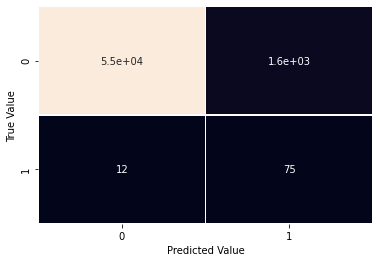

In [210]:
sns.heatmap(cm5_RF, annot=True, linewidths=.5,cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

<h2> 2.3) Oversampling </h2>

In [211]:
from imblearn.over_sampling import SMOTE 

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)

X_os, y_os = sm.fit_resample(X_train,y_train)
print('Resampled dataset shape %s' % Counter(y_os))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 226594, 1: 226594})


In [212]:
model6 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample',random_state=0)
model6.fit(X_os,y_os)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=10,
                       random_state=0)

In [213]:
pred_over = model6.predict(X1_test)

In [214]:
cm6_RF=confusion_matrix(y1_test,pred_over)
print(classification_report(y1_test,pred_over))
cm6_RF

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.88      0.80      0.84        87

    accuracy                           1.00     56746
   macro avg       0.94      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746



array([[56649,    10],
       [   17,    70]])

This seems to be the best model so far 

<h1>3) SVM</h1>

<h2>3.1) All the Dataset </h2>

<h3><i>3.1.1) Without weights</i> </h3>

In [215]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X1_test)

In [216]:
print(classification_report(y1_test, y_pred))
cm7=confusion_matrix(y1_test,y_pred)
cm7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.98      0.71      0.83        87

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



array([[56658,     1],
       [   25,    62]])

<h3><i>3.1.2) With Weights</i></h3>

In [217]:
#We assign the minority class the weight of the ratio of the majority class
class_weight={0:1,1:598}

In [218]:
svm_classifier = svm.SVC(class_weight=class_weight)
svm_classifier.fit(X_train,y_train)
y2_pred=svm_classifier.predict(X1_test)

In [ ]:
print(classification_report(y1_test, y2_pred))
cm8=confusion_matrix(y1_test,y2_pred)
cm8

The weighted SVM performed better.

<h2> 3.2) Undersampling </h2>

In [220]:
df_non_fraud=df[df['Class']==0]
df_fraud=df[df['Class']==1]
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [221]:
df_fraud.shape,df_non_fraud.shape

((473, 31), (283253, 31))

In [222]:
from sklearn.utils import resample

df_non_fraud_downsampled=resample(df_non_fraud,
                                replace=False,
                                n_samples=473,
                                random_state=1)
len(df_non_fraud_downsampled)

473

In [223]:
df_fraud_downsampled=resample(df_fraud,
                                replace=False,
                                n_samples=473,
                                random_state=1)
len(df_fraud_downsampled)

473

In [224]:
df_downsample=pd.concat([df_non_fraud_downsampled,df_fraud_downsampled])
df_downsample.shape

(946, 31)

In [225]:
X1=df_downsample.drop('Class',axis=1).copy()
y1=df_downsample['Class']
X1.shape, y1.shape

((946, 30), (946,))

In [226]:
X_train_down,X_test_down,y_train_down,y_test_down=train_test_split(X1,y1,random_state=1, test_size=0.2)
X_train_down.shape,y_train_down.shape

((756, 30), (756,))

In [227]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_down,y_train_down)
y_pred_down=svm_classifier.predict(X_test_down)

In [228]:
print(classification_report(y_test_down, y_pred_down))
cm9=confusion_matrix(y_test_down,y_pred_down)
cm9

              precision    recall  f1-score   support

           0       0.56      0.51      0.53        96
           1       0.54      0.59      0.56        94

    accuracy                           0.55       190
   macro avg       0.55      0.55      0.55       190
weighted avg       0.55      0.55      0.55       190



array([[49, 47],
       [39, 55]])

<h2><i style="color:blue" >Conclusion</i></h2>

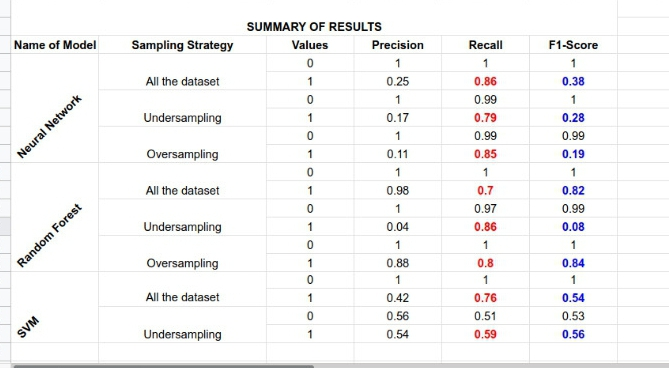

<p><strong><i style="color:blue" >Having used different models we have come to the conclusion that the Random Forest Classifier gives the best overall performance.</i></strong></p>

The method of penalizing the majority class when using the whole dataset was adopted in order to enhance performance by assigning more weights to the minority class.
    
Before using each of the models, hyperparameter tuning was done (which is not shown in this notebook) in order to get the best hyperparameters that will give the best model.

## References

machinelearningmastery <a href="https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/">(1)</a>
scikitlearn <a href="https://scikit-learn.org/stable/modules/svm.html">(2)</a>
imbalancedlearn <a href="https://imbalanced-learn.org/stable/over_sampling.html">(3)</a> and many other sites.